In [1]:
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
font = {'size'   : 20}
mpl.rc('font', **font)

# Open dataframe

In [4]:
fname = "/Users/artur/cernbox/HGCAL/HGCROC/v2/measurements/run_TC_samp_scan_250DAC/scan/trg_df_sumTC4.h5"

In [5]:
df_trg = pd.read_hdf(fname)

Create `delay` column

In [6]:
n_bx = 5 # number of BXs per event
df_trg["delay"] = (df_trg.index%n_bx) * 25 + (df_trg.phase+1)%16 * 25/16

In [7]:
df_trg.head()

tc_sum  tc  chan  phase     delay
event                                   
0         320   0     0      0    1.5625
1         320   0     0      0   26.5625
2         704   0     0      0   51.5625
3         384   0     0      0   76.5625
4         320   0     0      0  101.5625

# Plot sampling scan

Plot single channel

Text(0,0.5,u'TC sum')

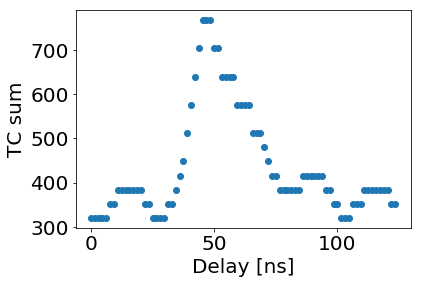

In [11]:
sel = df_trg.tc == 0
sel &= df_trg.chan == 0
df_sel = df_trg[sel]
plt.plot(df_sel.delay, df_sel.tc_sum, "o")
plt.xlabel("Delay [ns]")
plt.ylabel("TC sum")

Plot for all TCs

Text(0,0.5,u'TC sum (pedestal subtracted)')

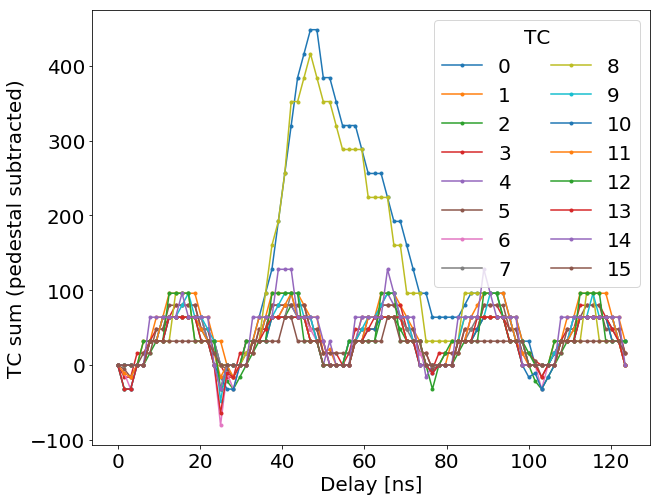

In [9]:
plt.figure(figsize = (10,8))

for tc in sorted(df_trg.tc.unique()):
    sel = df_trg.tc == tc
    df_sel = df_trg[sel]
    
    prof = df_sel.groupby("delay").tc_sum.mean()
    x = prof.index
    y = prof.values
    
    y -= y[0]
    
    plt.plot(x,y, ".-", label = tc)
plt.legend(title = "TC", ncol = 2)
plt.xlabel("Delay [ns]")
plt.ylabel("TC sum (pedestal subtracted)")